## IMD0033 - Probabilidade

# Trabalho I 

Este trabalho servirá como avaliação dos conteúdos relacionados a Estatística Descritiva.

Data de entrega: Até 23:59 do dia 10/09

Forma de entrega: Via SIGAA na forma de um jupyter notebook.

### Questão 1 (2 pontos)

Defina com suas palavras e de forma sucinta os termos abaixo:

a) (0,25 pontos) População

Respota: Corresponde ao conjunto de TODOS os indivíduos que possuam a característica de interesse para a pesquisa ou estudo.

b) (0,25 pontos) Amostra

Respota: É o subconjunto da população.

c) (0,25 pontos) Conceito (em um desenho experimental)

Resposta: Objeto ideal, ou abstrato na qual deseja-se estudar. Exemplo: Memória.

d) (0,25 pontos) Definição operacional

Resposta: Metodologia utilizada para quantificar ou medir o conceito. Exemplo: Teste de QI para "medir" a memória.

e) (0,25 pontos) Desvio

Resposta: Diferença entre o valor de uma amostra com a média.

f) (0,25 pontos) Medidas de tendência central

Resposta: Medidas da estatística descritiva que procura descrever a posição na qual os dados estão concentrados. Exemplos: Moda, Mediana e Média.

g) (0,25 pontos) Medidas de dispersão

Resposta: Medidas da estatística descritiva que procura descrever a dispersão dos dados. Exemplo: Amplitude, Intervalo entre quartis, Variância e Desvio Padrão.

h) (0,25 pontos) Outlier

Resposta: Uma amostra que possui um valor extremo em relação às outras amostras.

### Questão 2 (2 pontos)

Reflita sobre as seguintes afirmações, indique se é verdadeiro ou falso e justifique:

a) (0,5 pontos) Se a variância de um conjunto de dados é 0,1, podemos certamente afirmar que os dados encontram-se muito dispersos da média.

Resposta: FALSO. A variância é uma medida de dispersão que possui unidade, portanto não podemos saber apenas com o valor da variância se os dados se encontram dispersos ou não.

b) (0,5 pontos) A covariância é a média do quadrado dos desvios.

Resposta: FALSO. A covariância é a média do produto dos desvios de duas variáveis.

c) (0,5 pontos) Quando transformamos os dados através do z-score, a distribuição dos dados se torna uma normal.

Resposta: FALSO. Apesar da transformação do z-score tornar qualquer conjunto de dados com média igual a zero e o desvio padrão igual a 1, a sua distribuição permanece a mesma, ou seja, ela continuará com a mesma distribuição.

d) (0,5 pontos) Ao analisar a correlação entre duas variáveis, se verificarmos uma correlação de 0.9, o que é considerada alta, não podemos afirmar que a variável independente seja a causa da variável dependente.

Resposta: VERDADEIRO. Mesmo que a correlação tenha dado um valor alto, ela não implica na causa do fenômeno. Para verificar se ela é realmente a causa, devemos proceder com experimentos do tipo caso-controle.

### Questão 3 (3 pontos)

Nesta questão, considere o arquivo [CO2_emission.txt](CO2_emission.txt). Este arquivo contém dados de emissão de CO2 em kT (quilotonelada) emitido pelos países ao longo no período de 2000 a 2014. Desconsiderando aqueles países que apresentam valores faltantes (".."), responda:

a) (0,5 pontos) Qual foi o país que menos emitiu CO2 ao longo destes anos?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("CO2_emission.txt", sep="\t", header=0,index_col=2,na_values="..")
year = data.filter(regex='YR')
year = year.dropna()
year["sum"] = year.sum(axis=1)
year.sort_values("sum", ascending=True).head(1)

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],sum
Country Name,,,,,,,,,,,,,,,,
Tuvalu,7.334,7.334,11.001,11.001,11.001,11.001,7.334,11.001,11.001,11.001,7.334,7.334,11.001,11.001,11.001,146.68


b) (1 ponto) Qual foi o país que teve a menor média da taxa de emissão de CO2 ao longo destes anos? Considere a taxa de emissão de CO2 como sendo a razão entre a quantidade de CO2 emitido em um ano com o emitido no ano anterior.

In [3]:
year["tax"] = (year["2014 [YR2014]"]/year["2000 [YR2000]"])**(1/14)
year.sort_values("tax", ascending=True).head(1)

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],sum,tax
Country Name,,,,,,,,,,,,,,,,,
Aruba,2379.883,2409.219,2438.555,2563.233,2618.238,2720.914,2717.247,2823.59,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746,34051.762,0.930853


c) (0,5 pontos) Qual posição o Brasil ocupa no rank dos países que mais emitiram CO2 ao longo destes anos?

In [4]:
# índice numérico do Brasil:
br_idx = year.index.get_loc("Brazil")

# colocar a soma da emissão do país em uma lista numpy
listSum = np.array(year["sum"])

idxList = np.argsort(listSum)

count = 0
for i in idxList:
    if (i == br_idx):
        break
    else:
        count += 1

print(len(year) - count)

year.sort_values("sum", ascending=False).head(16)

16


,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],sum,tax
Country Name,,,,,,,,,,,,,,,,,
China,3405179.867,3487566.356,3850269.326,4540417.061,5233538.733,5896957.705,6529291.518,7030797.772,7553070.247,8001008.965,8776040.416,9733538.120,1.002857e+07,1.025801e+07,1.029193e+07,1.046162e+08,1.082209
United States,5693684.894,5595794.329,5641309.133,5675701.926,5756075.232,5789727.291,5697285.888,5789030.561,5614110.994,5263505.457,5395532.125,5289680.503,5.119436e+06,5.159161e+06,5.254279e+06,8.273431e+07,0.994280
Russian Federation,1557899.281,1557506.912,1557085.207,1604242.827,1602115.967,1615089.813,1669262.404,1666886.188,1714978.893,1574045.082,1670531.186,1763405.295,1.830830e+06,1.778561e+06,1.705346e+06,2.486779e+07,1.006480
India,1031853.463,1041152.975,1054258.833,1099597.621,1154320.262,1222563.132,1303717.509,1407607.286,1568379.567,1738645.711,1719690.988,1841776.419,2.018504e+06,2.034752e+06,2.238377e+06,2.247520e+07,1.056872
Japan,1220527.947,1203377.388,1220047.570,1242093.574,1266009.748,1239255.316,1231495.944,1252229.162,1210135.669,1103869.676,1171624.835,1191074.603,1.230168e+06,1.246516e+06,1.214048e+06,1.824247e+07,0.999620
Germany,829977.779,853662.932,829724.756,822812.461,816802.248,797180.131,816472.218,780546.619,780564.954,722263.321,758859.981,732497.918,7.398613e+05,7.573125e+05,7.198834e+05,1.175842e+07,0.989887
Canada,534380.909,527926.989,519335.208,553100.944,552198.862,557417.003,543819.767,554355.058,561028.998,536764.459,534670.602,537112.824,5.174577e+05,5.171607e+05,5.371935e+05,8.083924e+06,1.000375
"Korea, Rep.",447561.017,450193.923,465631.993,466215.046,482276.506,462922.080,470655.783,495675.724,507589.807,508862.256,566716.515,589400.577,5.839661e+05,5.924992e+05,5.871564e+05,7.677323e+06,1.019581
"Iran, Islamic Rep.",372237.170,398437.885,401760.187,418437.703,447036.636,468807.615,509338.966,519324.207,541582.897,554278.051,573031.089,589055.879,6.117583e+05,6.197780e+05,6.494807e+05,7.674345e+06,1.040561


d) (1 ponto) A Noruega é um dos países que vem fazendo esforço para diminuir a emissão de CO2. Abaixo se encontra o gráfico que demonstra a quantidade de CO2 emitido por este país ao longo do período apresentado pelos dados. Tendo em mente este padrão de emissão de CO2 da Noruega, qual o país que possui um padrão de emissão de CO2 mais similar ao padrão da Noruega? Plote um gráfico que consiga demonstrar a semelhança dos padrões de emissão de CO2 entre os dois países. Plote também no mesmo gráfico o padrão de emissão de CO2 do país que seja menos similar ao padrão da Noruega.

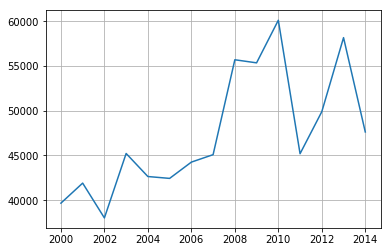

In [5]:
year["mean"] = year.loc[:,'2000 [YR2000]':'2014 [YR2014]'].mean(axis=1)
year["std"] = year.loc[:,'2000 [YR2000]':'2014 [YR2014]'].std(ddof=0,axis=1)
norwaydata = year.loc["Norway",:]
norwaystd = norwaydata["std"]
norwaydata = norwaydata['2000 [YR2000]':'2014 [YR2014]'] - norwaydata["mean"]

desvio = year
desvio = desvio.filter(regex="YR")
mean = year["mean"]
prodSd = year["std"]*norwaystd

desvio = desvio.sub(mean, axis=0)
proddesvio = desvio*norwaydata
mediaproddesvio = proddesvio.mean(axis=1)
corr = mediaproddesvio/prodSd
print(corr.sort_values(ascending=False).head(2))

print(corr.sort_values(ascending=False).tail(1))

Country Name
Norway     1.000000
Grenada    0.834282
dtype: float64
Country Name
Macedonia, FYR   -0.764877
dtype: float64


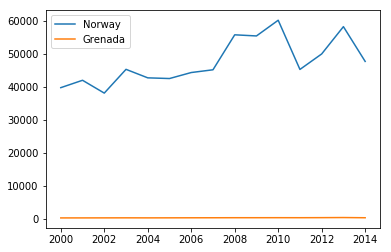

In [6]:
# Nesta análise podemos verificar que Grenada é o que possui a correlação mais alta com os dados de Noruega.
years = range(2000,2015)

plt.plot(years, year.loc["Norway"][0:15], label="Norway")
plt.plot(years, year.loc["Grenada"][0:15], label="Grenada")
plt.legend()
plt.show()

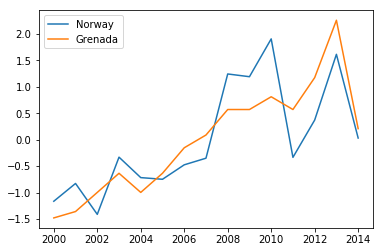

In [7]:
# No entanto, ao plotar os dois gráficos de forma direta, não é possível verificar claramente
# que os dois possuam um padrão similar. Isso se deve ao problema de escala dos valores.
# Para comparar os padrões, podemos plotar os dados transformados pelo z-score de 
# Noruega e Grenada.

def zTran(numList):
    numList=np.array(numList)
    numList = (numList - numList.mean())/numList.std()
    return numList

plt.plot(years, zTran(year.loc["Norway"][0:15]), label="Norway")
plt.plot(years, zTran(year.loc["Grenada"][0:15]), label="Grenada")
plt.legend()
plt.show()

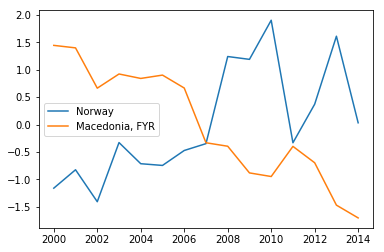

In [8]:
plt.plot(years, zTran(year.loc["Norway"][0:15]), label="Norway")
plt.plot(years, zTran(year.loc["Macedonia, FYR"][0:15]), label="Macedonia, FYR")
plt.legend()
plt.show()

### Questão 4 (3 pontos)

Considere nesta questão o arquivo de dados [wdbc.data](wdbc.data). Estes dados contém algumas medidas de células tumorais de mama. Uma breve descrição das colunas podem ser obtidas a partir do arquivo [wdbc.names](wdbc.names). As amostras de células tumorais contidas nesta tabela foram classificadas em benigno (B) ou maligno (M). Diante disso pede-se:

a) (0,75 pontos) Indique a variável numérica que apresenta a maior variação (ou dispersão).

In [9]:
col = ["id","class","radius","texture","perimeter","area","smoothness","compactness","concavity","concave points","symmetry","fractal dimension","radius SE","texture SE","perimeter SE","area SE","smoothness SE","compactness SE","concavity SE","concave points SE","symmetry SE","fractal dimension SE","radius Worst","texture	Worst","perimeter Worst","area Worst","smoothness Worst","compactness Worst","concavity Worst","concave points Worst","symmetry Worst","fractal dimension Worst"]
data = pd.read_csv("wdbc.data", header=None, names=col, index_col=0)

mean = data.mean()
std = data.std()

cv = std/mean
cv


radius                     0.249450
texture                    0.222971
perimeter                  0.264208
area                       0.537364
smoothness                 0.145954
compactness                0.506155
concavity                  0.897753
concave points             0.793204
symmetry                   0.151325
fractal dimension          0.112430
radius SE                  0.684432
texture SE                 0.453340
perimeter SE               0.705448
area SE                    1.127771
smoothness SE              0.426435
compactness SE             0.702884
concavity SE               0.946458
concave points SE          0.523077
symmetry SE                0.402407
fractal dimension SE       0.697270
radius Worst               0.297079
texture\tWorst             0.239366
perimeter Worst            0.313278
area Worst                 0.646568
smoothness Worst           0.172491
compactness Worst          0.618789
concavity Worst            0.766470
concave points Worst       0

b) (0,75 pontos) Para cada grupo de amostras (tumor benigno/maligno), calcule a média e o desvio padrão de cada uma das variáveis numéricas.

In [10]:
benigno = data[data["class"] == "B"]

maligno = data[data["class"] == "M"]

b_mean = benigno.mean()
b_std = benigno.std()

m_mean = maligno.mean()
m_std = maligno.std()

In [11]:
print("Média")
media = data.groupby('class').mean()
media

Média


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,...,radius Worst,texture Worst,perimeter Worst,area Worst,smoothness Worst,compactness Worst,concavity Worst,concave points Worst,symmetry Worst,fractal dimension Worst
class,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [12]:
print("Desvio padrao")
desvio = data.groupby('class').std()
desvio

Desvio padrao


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,...,radius Worst,texture Worst,perimeter Worst,area Worst,smoothness Worst,compactness Worst,concavity Worst,concave points Worst,symmetry Worst,fractal dimension Worst
class,,,,,,,,,,,,,,,,,,,,,
B,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
M,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553


c) (0,75 pontos) Plote um gráfico de forma que você consiga visualizar os valores de medidas calculadas no item anterior.

In [13]:
benigno_mean = np.array(media.loc["B"])
benigno_std = np.array(desvio.loc["B"])

maligno_mean = np.array(media.loc["M"])
maligno_std = np.array(desvio.loc["M"])

labels = media.columns
x_pos = np.arange(len(labels))*2
x_pos

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58])

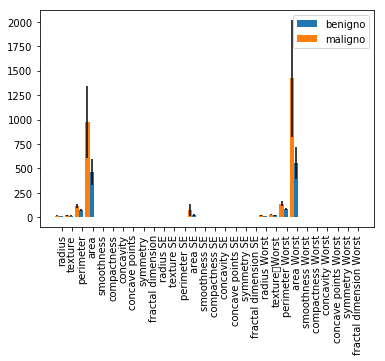

In [14]:
plt.bar(x_pos-0.2, benigno_mean, yerr=benigno_std, label="benigno")
plt.bar(x_pos-1,maligno_mean,yerr=maligno_std, label="maligno")
plt.xticks(x_pos, labels, rotation='vertical')
plt.legend()
plt.show()

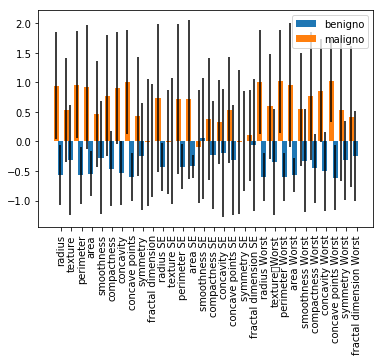

In [15]:
# Por causa das diferentes escalas, colocar as diferentes medidas em um mesmo gráfico fica ruim.
# Uma das soluções seria plotar os gráficos de forma individual, mas podemos também normalizar os dados utilizando o 
# z-score para que todas as medidas tenham uma média igual a zero e desvio padrão igual a 1:

# Trabalhando com dados normalizados:
ndata = data.loc[:, "radius":"fractal dimension Worst"]
ndata = ((ndata-mean)/std)

benigno = ndata[data["class"] == "B"]

maligno = ndata[data["class"] == "M"]

b_mean = benigno.mean()
b_std = benigno.std()

m_mean = maligno.mean()
m_std = maligno.std()

labels = media.columns
x_pos = np.arange(len(labels))*4
x_pos

plt.bar(x_pos-0.4, b_mean, yerr=b_std, width=2, label="benigno")
plt.bar(x_pos-2,m_mean,yerr=m_std, width=2, label="maligno")
plt.xticks(x_pos, labels, rotation='vertical')
plt.legend()
plt.show()

d) (0,75 pontos) O interesse deste trabalho é verificar se algumas destas variáveis podem ajudar na classificação de novas amostras tumorais em benigno ou maligno. Com base no gráfico que você gerou no item anterior, sugira uma medida que seja importante na distinção entre o tumor benigno e maligno.

Resposta: Para encontrar uma medida que seja capaz de diferenciar células tumorais entre benigno e maligno, o ideal seria trabalhar com aquelas medidas que tenham médias distintas e desvio padrão baixo (ou cujas barras de erro não se tocam). A partir do gráfico anterior, algumas medidas que podem ser citadas seriam:

- radius; 
- perimeter;
- area; 
- concave points;
- radius Worst;
- perimeter Worst;
- area Worst;
- concave points Worst. 